In [61]:
using Plots
using Plots.PlotMeasures
using JLD2
using StatsBase
using StatsPlots

# Inspect Benchmarking Results

Run 1:
- chi_max: [5, 30]
- d: [2, 10]
- eta: [0.001, 10]
- n = 30 models
- Particle Swarm Optimisation

In [5]:
f = jldopen("ItalyPowerBench_eta001:10_d2:10_chi5:30.jld2", "r");
per_fold_accs = read(f, "per_fold_accs");
per_fold_best_model = read(f, "per_fold_best_model");

In [24]:
mean_acc = mean(per_fold_accs);
println("Mean Acc: $mean_acc")
median_acc = median(per_fold_accs);
println("Median Acc: $median_acc")
range_acc = maximum(per_fold_accs) - minimum(per_fold_accs)
println("Range Acc: $range_acc")
std_acc = std(per_fold_accs)
println("Std Acc: $std_acc")
standard_err_acc = std_acc / sqrt(length(per_fold_accs));
println("Standard Error Acc: $standard_err_acc")

Mean Acc: 0.9538710722384192
Median Acc: 0.9572400388726919
Range Acc: 0.048590864917395504
Std Acc: 0.011810908964858069
Standard Error Acc: 0.0021563670882309184


Inspect the distribution of optimal parameters

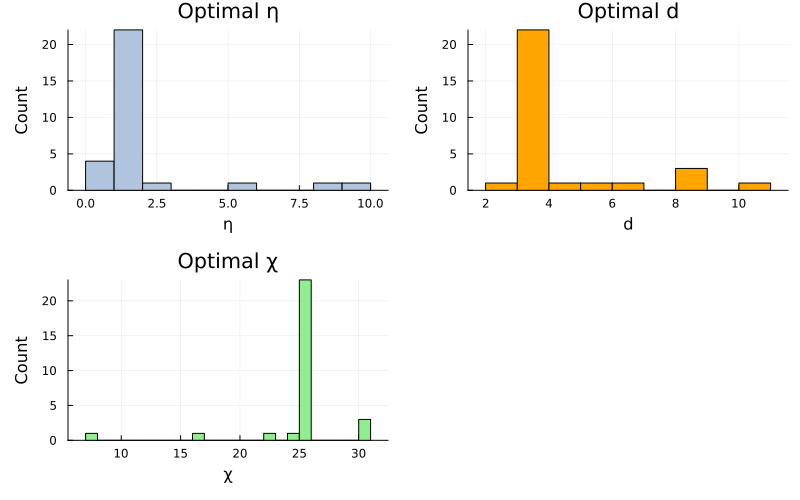

In [63]:
all_etas = [per_fold_best_model[i]["eta"] for i in 1:length(per_fold_best_model)]
all_ds = [per_fold_best_model[i]["d"] for i in 1:length(per_fold_best_model)]
all_chis = [per_fold_best_model[i]["chi_max"] for i in 1:length(per_fold_best_model)];
p1 = histogram(all_etas, label="", xlabel="η", ylabel="Count", title="Optimal η", c=:lightsteelblue)
p2 = histogram(all_ds, label="", xlabel="d", ylabel="Count", title="Optimal d", c=:orange)
p3 = histogram(all_chis, label="", xlabel="χ", ylabel="Count", title = "Optimal χ", c=:lightgreen)
plot(p1, p2, p3, size=(800, 500), left_margin=5mm, bottom_margin=5mm)

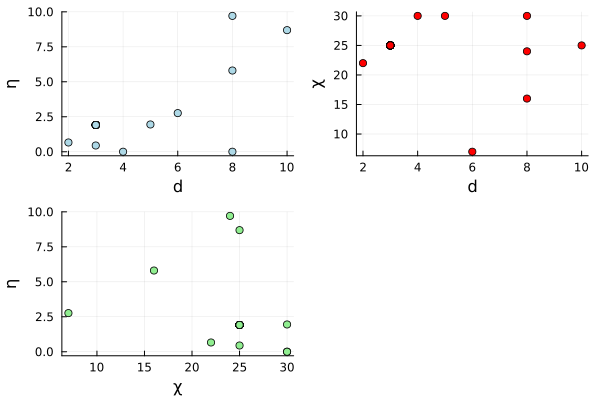

In [86]:
p1 = scatter(all_ds, all_etas, label="", xlabel="d", ylabel="η", color=:lightblue)
p2 = scatter(all_ds, all_chis, label="", xlabel="d", ylabel="χ", color=:red)
p3 = scatter(all_chis, all_etas, label="", xlabel="χ", ylabel="η", color=:lightgreen)
plot(p1, p2, p3)